In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Establecer la semilla para reproducibilidad
np.random.seed(42)

# Paso 1: Generar una base de datos sintética
# Definir los artículos
items = ['Leche', 'Pan', 'Mantequilla', 'Queso', 'Yogur',
         'Cereal', 'Jugo', 'Fruta', 'Verdura', 'Galletas']

# Generar transacciones aleatorias
num_transactions = 20  # número total de transacciones
transactions = []

for _ in range(num_transactions):
    # Cada transacción tiene entre 1 y 5 artículos
    num_items = np.random.randint(1, 6)
    transaction = np.random.choice(items, size=num_items, replace=False)
    transactions.append(list(transaction))



In [2]:
# Convertir la lista de transacciones a un DataFrame
# Aplanar la lista de transacciones
transaction_df = pd.DataFrame(transactions)

# Crear un formato de "one-hot encoding" para las transacciones
basket = transaction_df.stack().reset_index(level=1, drop=True).reset_index()
basket.columns = ['Item', 'Transaction']
basket['value'] = 1
basket = basket.pivot_table(index='Transaction', columns='Item', values='value', fill_value=0)

# Paso 2: Aplicar el algoritmo FP-Growth
frequent_itemsets = fpgrowth(basket, min_support=0.02, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-3-cf9812e5a59e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=frequent_itemsets.sort_values('support', ascending=False).head(10), palette='viridis')


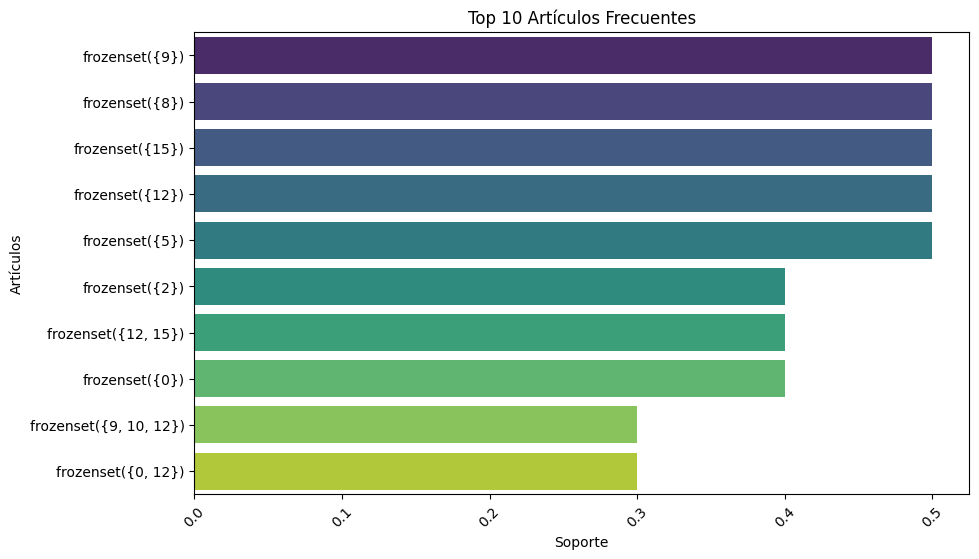

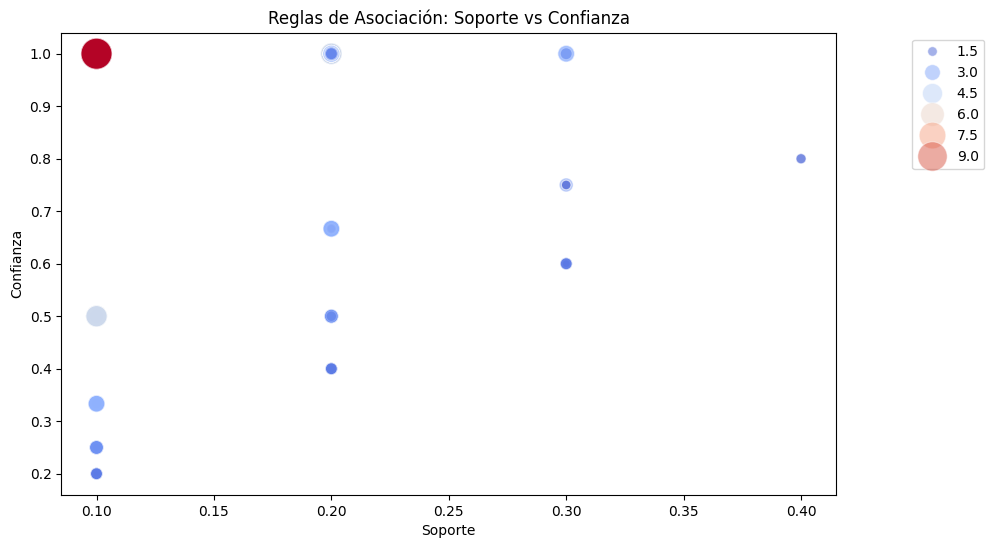

Conjuntos Frecuentes:
     support     itemsets
0        0.5          (9)
2        0.5          (8)
7        0.5         (15)
9        0.5         (12)
1        0.5          (5)
4        0.4          (2)
148      0.4     (12, 15)
8        0.4          (0)
846      0.3  (9, 10, 12)
156      0.3      (0, 12)

Reglas de Asociación:
           antecedents   consequents  antecedent support  consequent support  \
29407        (8, 1, 3)   (0, 12, 14)                 0.1                 0.1   
37171   (8, 1, 19, 12)       (3, 14)                 0.1                 0.1   
37174   (8, 3, 12, 14)       (1, 19)                 0.1                 0.1   
37175   (8, 19, 3, 12)       (1, 14)                 0.1                 0.1   
37178  (8, 19, 12, 14)        (1, 3)                 0.1                 0.1   
37179        (8, 1, 3)  (19, 12, 14)                 0.1                 0.1   
37180       (1, 3, 12)   (8, 19, 14)                 0.1                 0.1   
37181       (1, 3, 14)   (8, 

In [3]:
# Paso 3: Visualizar los resultados

# Visualización de los conjuntos de ítems frecuentes
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets.sort_values('support', ascending=False).head(10), palette='viridis')
plt.title('Top 10 Artículos Frecuentes')
plt.xlabel('Soporte')
plt.ylabel('Artículos')
plt.xticks(rotation=45)
plt.show()

# Visualización de reglas de asociación
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 500), alpha=0.5, hue='lift', palette='coolwarm')
plt.title('Reglas de Asociación: Soporte vs Confianza')
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# Mostrar resultados de conjuntos frecuentes y reglas
print("Conjuntos Frecuentes:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))

print("\nReglas de Asociación:")
print(rules.sort_values(by='lift', ascending=False).head(10))


Conjuntos Frecuentes
Los "conjuntos frecuentes" son los grupos de artículos que aparecen juntos en las transacciones más allá de un umbral de soporte definido. Aquí hay algunos aspectos importantes:

Support (Soporte): Es la proporción de transacciones que contienen el conjunto de artículos. Por ejemplo, un soporte de 0.5 significa que el conjunto de artículos aparece en el 50% de todas las transacciones.

Itemsets (Conjuntos de artículos): Son los diferentes conjuntos de artículos encontrados. Por ejemplo:

(9) tiene un soporte de 0.5, lo que significa que el artículo 9 está presente en el 50% de las transacciones.
(12, 15) tiene un soporte de 0.4, indicando que los artículos 12 y 15 están juntos en el 40% de las transacciones.
Estos resultados muestran cuáles artículos son los más populares y cuáles tienden a comprarse juntos.

Reglas de Asociación
Las "reglas de asociación" indican relaciones entre diferentes artículos y se expresan en forma de antecedentes y consecuentes:

Antecedents (Antecedentes): Son los artículos que, cuando están presentes en una transacción, implican que otros artículos también pueden estar presentes. Por ejemplo:
La regla (8, 1, 3) => (0, 12, 14) indica que si los artículos 8, 1, y 3 están presentes, hay una probabilidad alta de que también se encuentren los artículos 0, 12, y 14.
Métricas en las Reglas
Support (Soporte): Indica cuántas veces se cumple la regla en relación con el total de transacciones. Por ejemplo, un soporte de 0.1 significa que la regla se cumple en el 10% de las transacciones.

Confidence (Confianza): Mide la probabilidad de que el consecuente esté presente si el antecedente está. Una confianza de 1.0 significa que siempre que estén presentes los artículos en el antecedente, también lo están los del consecuente.

Lift: Es una medida que indica la fuerza de la regla. Un lift de 10.0 significa que la presencia de los antecedentes incrementa la probabilidad de encontrar los consecuentes en 10 veces más que si fueran independientes.

Leverage y Conviction: Son métricas adicionales que ayudan a entender la relación entre los antecedentes y los consecuentes. El leverage mide el cambio en la probabilidad de que ocurran juntos en comparación con lo esperado. La conviction mide cuánto se desvía la regla de una probabilidad de ocurrencia aleatoria.

Resumen Final
Conjuntos Frecuentes: Proporcionan información sobre los artículos que se compran juntos con cierta frecuencia.
Reglas de Asociación: Muestran cómo la compra de ciertos artículos puede implicar la compra de otros, ayudando a entender patrones de compra y a mejorar estrategias de marketing y recomendaciones de productos.